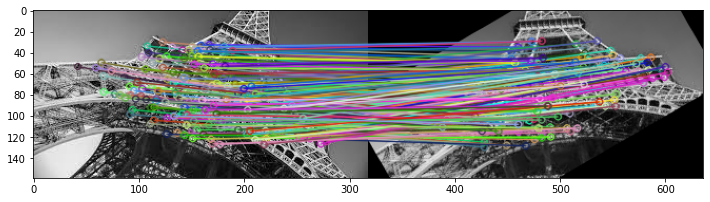

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('a3.jpg', cv2.IMREAD_GRAYSCALE)

rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1) 
distorted_img = cv2.warpAffine(img, M, (cols, rows))


akaze = cv2.AKAZE_create()
kp1, des1 = akaze.detectAndCompute(img, None)
kp2, des2 = akaze.detectAndCompute(distorted_img, None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des1, des2, k=2)


good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])


result = cv2.drawMatchesKnn(img, kp1, distorted_img, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(12, 8))
plt.imshow(result)
plt.show()
